# The Samples!

When you first saw the heading you might have thought I was talking about the Boulder, Colorado rock band (not so) notably featured in the 2011 documentary *The Best Band You've Never Heard Of*, but that's not what we're doing here.  But if you're looking for a few feels I highly recommend that at some point you head over to your favorite streaming service (after class obviously) and check out *Could It Be Another Change?*  So melodic, much harmony.  #sappylovesong

What does this have to do with data analysis?  I'm so glad you asked!

We've spent some time talking about uncertainty and looking at probability distributions, but probability distributions apply to the entire *population*.  The population is the total amount of instances, devices, people, etc. that we might want to measure.  For example, if I want to know the average typing speed of students at Oregon State University I would need to measure the typing speed of every single student at OSU and there's over 29,000!  No way am I putting in that kind of effort.  So what do we do?  We take a *sample*, a subset of measurements or observations that we decide will be representative of the total population.  

The problem is that, due to the uncertainty in our population, we have uncertainty in our sample?  How do I know that my sample is representative and accurately predicts population data?  How can I predict how wrong my sample might be?  These questions form the foundation of statistical analysis.  While it's nice to make cool plots and do lots of summary stats, what I need to know most is what to do when I only have a few data points.  

In order to know what to do the first thing I have to understand is how samples behave relative to the population. Upon this understanding we can build the tools which will help us understand all the ways in which we might be wrong.  

So today we will sample some data and do statistics on the samples and make plots about the samples and we will see how the samples relate to the population.  How sometimes the samples are good, and sometimes the samples are not good, and sometimes they're weird in ways that make them seem good at first but in the end they are not good.  

Thank you for coming to my Ted Talk.  Let's import some libraries and get after it!  We'll talk about each of the libraries as we use them.  For now I'm just going to import them.

In [59]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

### Generating Random Population Data for Testing

The first thing we want to do is get some population data to sample from.  Sometimes it's nice to just make some fake data to practice with.  We can do this using the Numpy library.  `numpy.random` has several functions for generating different kinds of randomly distributed data.  These are genrally called *random number generators*.  They are very useful for building simulations of [stochastic processes](https://en.wikipedia.org/wiki/Stochastic_process).  This library can generate random numbers following a variety of distributions.  

The following code will generate and array of 10 random numbers and assign the array to a variable named *population*.  The function `randn()` will generate values from a normal distribution with $\mu=0$ (mean) and $\sigma=1$ (std dev).

```Python
population = np.random.randn(10)
```

Go ahead and make your data in the cell below.

In [60]:
population = np.random.randn(10000)

Lets take a look at the data using the `print()` function.  After you have it printed, go ahead and run the previous cell a few times, and print the data below each time so you can see that the values are changing.   

In [61]:
# print(population)

Of course looking at a string of numbers doesn't really tell us anything.  Let try some visualization.  The best way to visualize single factor continuous data is to make a histogram.  We'll just use the histogram function included with matplotlib since we aren't dealing with a Pandas DataFrame.

```Python
plt.hist(population)
plt.xlim(-5,5)
plt.show()
```

The command `plt.xlim()` sets the axis limits on the x-axis.  This is going to be useful as we create further histograms.  By default matplotlib will scale the axis to the range of data.  If we fix the axis we can get a better visualization of the changes.

We don't *have* to include the `plt.show()`, but if we don't it will print some extra stuff to the output below.  An array of bin counts, and another of bin edges and also a list of *patches* that the plotting tool used to make the nice colored bits.  But `plt.show()` will suppress that so we don't have to look at it.  You can delete it and see what happens.  It won't break anything.

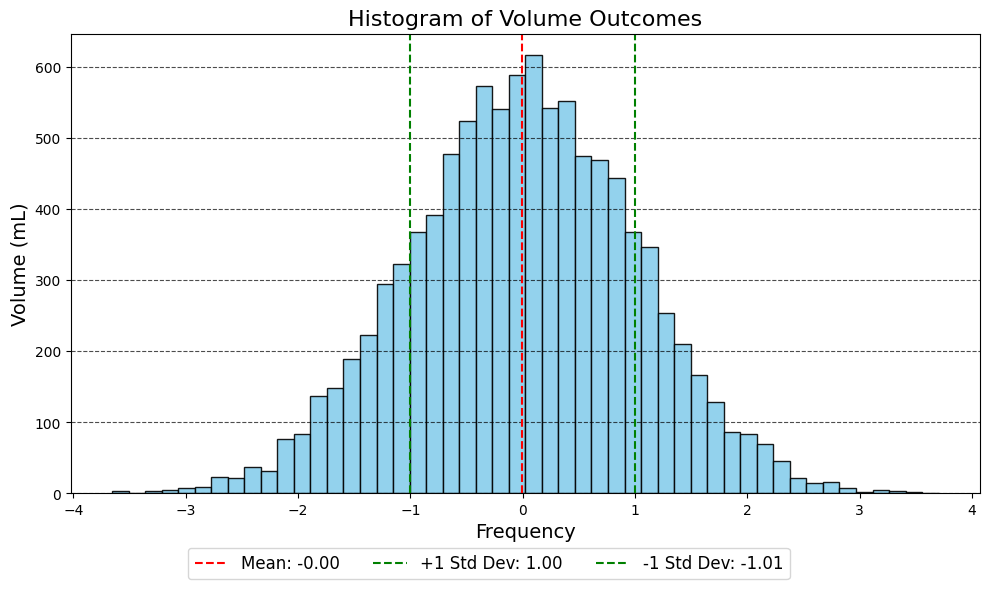

In [62]:
# I am reusing the code from the HW 2

def histogram_maker(data):
    
    # This defines details of the plot itself
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.9)
    plt.title('Histogram of Volume Outcomes', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Volume (mL)', fontsize=14)
    plt.grid(axis='y', linestyle='--', color='black', alpha=0.7)
    
    # This gets the mean and std, then it uses those to add them to the histogram
    # This took longer than it was worth
    mean_value = np.mean(data)
    std_dev_value = np.std(data)
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_dev_value, color='green', linestyle='dashed', linewidth=1.5, label=f'+1 Std Dev: {mean_value + std_dev_value:.2f}')
    plt.axvline(mean_value - std_dev_value, color='green', linestyle='dashed', linewidth=1.5, label=f'-1 Std Dev: {mean_value - std_dev_value:.2f}')
    
    # Grabbing range because we need that also later
    range_value = np.max(data) - np.min(data)
    
    # A legend
    plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.8, -0.1), ncol=3)
    
    plt.tight_layout()
    plt.show()
    
    # Rounding the values so they arent awful
    mean_value = np.round(mean_value, 2)
    std_dev_value = np.round(std_dev_value, 2)
    range_value = np.round(range_value, 2)
    
    
    # The bonus of data we need later
    return mean_value, std_dev_value, range_value

mean_value, std_dev_value, range_value = histogram_maker(population)

This is a pretty boring histogram.  Just a few random collumns and it's hard to really tell what's going on.  That's because there's only 10 data points in our whole population.  We want a much bigger population.  Try changing the number of data points to 100 and run everything above this cell again.  Notice how the histogram changes.  Discuss this shape with your group. 

Each bar is called a *bin* and we can think of it like a bucket holding all of the data points within that range.  

Now let's start to refine our histogram.  First we will increase the number of data points to 1,000.  Then we will increase the number of bins in our histgram by adding a `bins=25` option to our histogram.

```Python
plt.hist(population,bins=25)
plt.show()
```

Increase the number of points as well as the number of bins.  Experiment with them until you have an intuitive feel for the result.  What happens if the number of bins get's larger while the population size stays the same?  What happens if the population size increases while the number of bins stays the same?  Remember you can use SHIFT+ENTER to run a single cell.

In the end, let's settle on 10,000 data points in our population, and 50 bins in our histogram.  This should give a decent bell curve.

### Basic Sampling

Now that we have our population, the next step is to figure out how to take a sample.  The strategy we will emply here is to generate random index variables and use them to pull values from the population array. 

The function `np.random.reandint()` will generate random positive integers.  Since we use integers to index the arrays we can just use it to generate random index values.  It takes two arguments.  The first is the highest possible integer. The second is the keyword argument *size* which tells us how many integers we want.  So if we set `size=5` then we will get 5 integers.  We'll go ahead an automate this to scale with the size of the population by setting the max value to the length of the population array.

```Python
# get largest index of population array
max_idx=len(population)

# define number of measurements in the sample
n=5

# get random index values
idx = np.random.randint(max_idx,size=n)
print(idx)

# get sample
sample = population[idx]
print(sample)
```

Run this cell a few times to see how the values change.  

In [63]:
max_idx = len(population)

n = 5

idx = np.random.randint(max_idx, size=n)
print(idx)
print(std_dev_value)

sample = population[idx]
print(sample)

[8679  648 3320 1905 4803]
1.0
[-0.30758601  0.85943584 -0.78789381  0.79755077  0.83531277]


Now we want to start to looks at the summary statistics of the sample.  Edit the cell above to also calculate the mean and standard deviation of the sample.  Don't forget to include some well-formatted output so we can read the output.

```Python
# calculate x_bar
x_bar = np.mean(sample)
print("x-bar: {}".format(x_bar))
```

You can use `np.std()` to calculate the standard deviation.

Now run that cell several times and pay attention to how the mean changes.  Remember that our population has a mean of 0 and a standard deviation of 1.  How often does the sample of 5 measurements accurately reflect the population?

### Repeated Sampling

Just as we need many data points to describe a population, it's useful to have many samples to understand how the sample means are distributed.  Let's build a short for-loop to take many samples and save all the sample means.  

```Python
# intialize list of sample means
x_bar=[]

# number of measurements per sample
n = 25

# loop to pull samples and calculate averages
for i in range(100):
    
    # get random index values
    idx = np.random.randint(len(population),size=n)
    
    # get sample
    sample = population[idx]
    
    # save sample mean in x_bar
    x_bar.append(np.mean(sample))
```

When you get the loop working you can make a histogram out of `x_bar`.

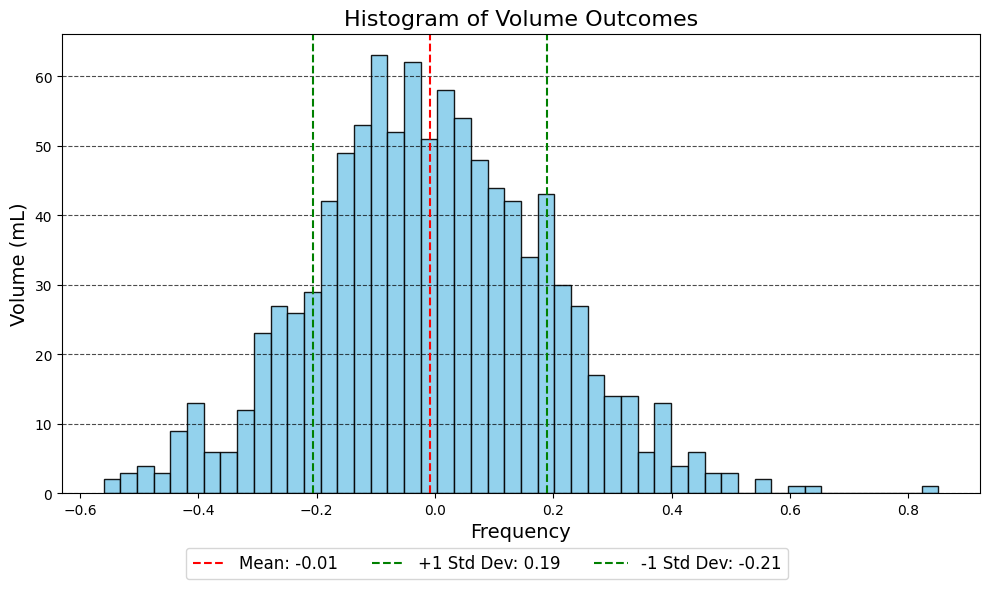

In [64]:
x_bar = [] 
n = 25

for i in range(1000):
    
    idx = np.random.randint(len(population), size=n)
    
    sample = population[idx]
    
    x_bar.append(np.mean(sample))
    
mean_value, std_dev_value, range_value = histogram_maker(x_bar)


How does the spread of the sample mean histogram compare to the spread of the population?  Increase the number of samples to 1000 (number of times the loop runs, not the number of measurements in a sample).  What does the histogram look like?

Now increase the number of measurements per sample from 5 to 10.  How does the spread of this histogram change?  What if we go to 25?  Or 50?  

The spread of the sample mean distribution is called the *standard error or the mean* and it depends on both the standard deviation of the population and also the number of measurements in a sample.

### Central Limit Theorem

In the previous example we were sampling from a population that was normally distributed so it makes sense that our sample mean distribution would also be normally distributed.  But what happens if our population is not normally distributed?

This code will generate a skewed distribution.

```Python
population = np.random.gamma(2,2,10000)
```

Repeat the analysis above for this population.  Generate a histogram of the population.  Then take some individual samples and see how they behave.  Finally loop through and take samples of 5 measurements and plot the sample mean distribution.  Now increase the number of measurements per sample and repeat.  Then increase again.  How many measurements do you need to get a nice normal distribution?

Also calculate the population average.  How does this compare with the sample average distribution?

Add as many cells as you need.

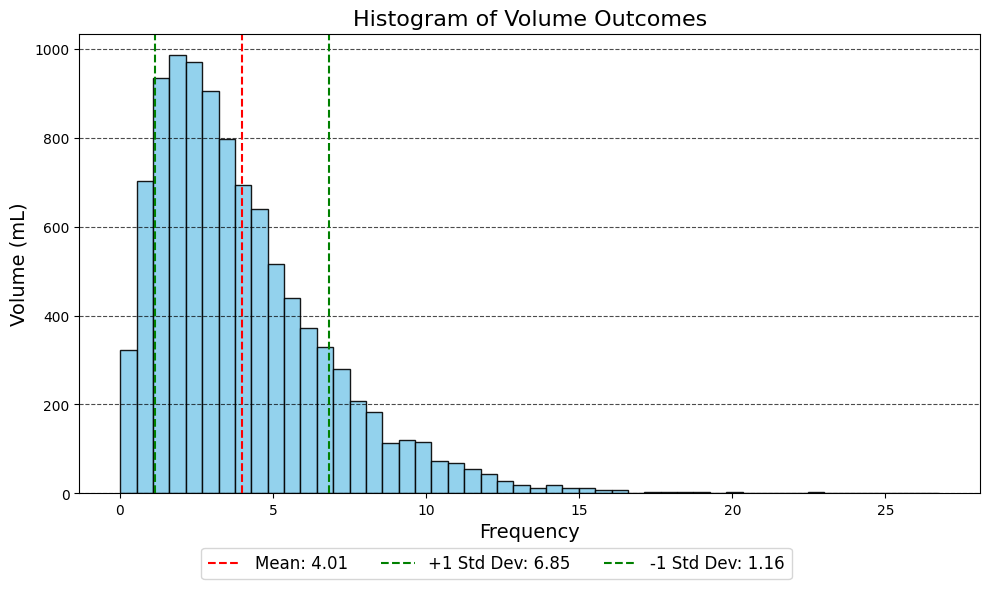

(np.float64(4.01), np.float64(2.84), np.float64(26.73))

In [65]:
population = np.random.gamma(2,2,10000)

histogram_maker(population)

### Real Data!

So this is neat and all, but you're probably wondering how it all works out if we actually use some real data.  Let's use our penguin data set since we're already comfortable with it.

Read the data into a pandas DataFrame.  Use your notebook from last week as reference. Go ahead and run the `df.head()` function just to orient yourself.

In [66]:
script_directory = os.getcwd()
penguin_data_path = os.path.join(script_directory, 'penguins_size.csv')

# This just tries to read the CSV and tells me if it breaks 
def csv_reader(filepath):
    
    try:
        data = pd.read_csv(filepath) 
        print(f'CSV file found, successfully loaded.')
        return data 
    
    except Exception as e:
        print(f'Error reading CSV: {e}')
        return None

penguin_data = csv_reader(penguin_data_path)


CSV file found, successfully loaded.


First lets figure out how to take one sample from the data.  Fortunately this is built right into pandas!  It's almost like the developers thought about doing stats...

Let's say we want a sample of 5 data points from the *culmen_length_mm* column.  This code will pull the sample.  Run it a few times to see the sample change.  Note the index and values.

```Python
df["culmen_length_mm"].sample(n=5)
```

In [67]:
culmen_sample = penguin_data['culmen_length_mm'].sample(n=50)
# print(culmen_sample)

We can use the `.mean()` function on the sample just like we could on the groupby().  

```Python
df["culmen_length_mm"].sample(n=5).mean()
```

In [68]:
culmen_mean = np.mean(culmen_sample)
print(culmen_mean)

44.24897959183673


Now calculate the sample standard deviation.  Again use your notebook from week 2 as reference.  

*(Note:  In both of these cases the sample changes every time we run the cell.  We will learn in just a few cells how to pull one sample and calculate both statistics)*

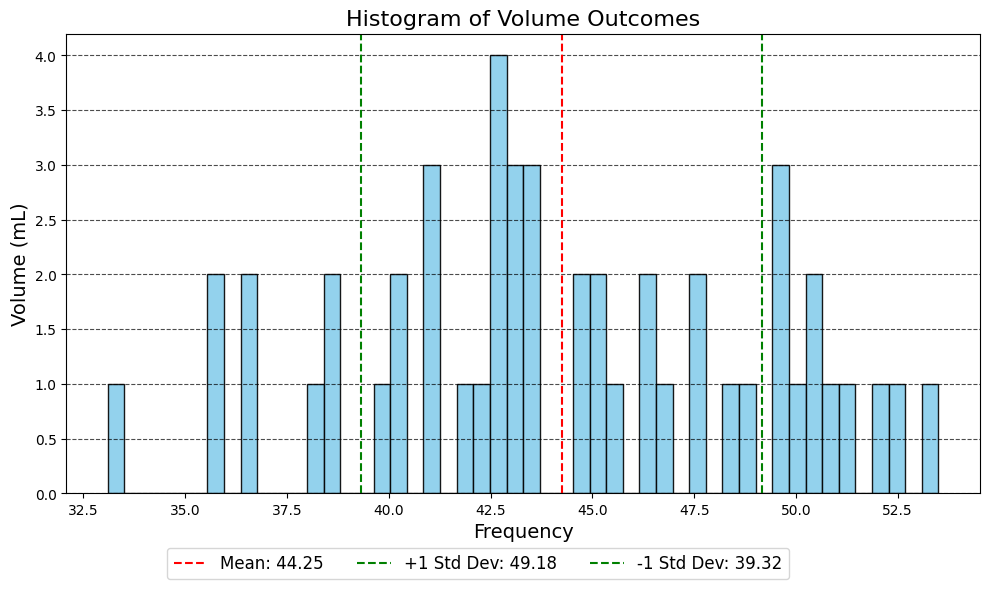

In [69]:
mean_value, std_dev_value, range_value = histogram_maker(culmen_sample)

What happens if we only want to work with the data from one species.  We learned last week how to isolate species data using a boolean index.  Pandas uses *hierarchical indexing*, so we can pull values using a boolean index and then get values from a column like this.  Try it below.

```Python
Adelie_idx = df["species"] == "Adelie"
df[Adelie_idx]["culmen_length_mm"].sample(n=5).mean()
```

In [70]:
def penguin_sorting_function(data):
    # Check if the DataFrame is valid
    if data is None or data.empty:
        print("Error: The input DataFrame is empty or invalid.")
        return None, None, None

    # Check if the required columns exist
    if 'species' not in data.columns or 'culmen_length_mm' not in data.columns:
        print("Error: The required columns ('species', 'culmen_length_mm') are missing.")
        return None, None, None

    try:
        # Filter data for each species and sample 50 rows
        adelie_data = data[data['species'] == 'Adelie']['culmen_length_mm'].dropna().sample(n=50)
        chinstrap_data = data[data['species'] == 'Chinstrap']['culmen_length_mm'].dropna().sample(n=50)
        gentoo_data = data[data['species'] == 'Gentoo']['culmen_length_mm'].dropna().sample(n=50)
        
        adelie_data_flipper = data[data['species'] == 'Adelie']['flipper_length_mm'].dropna().sample(n=50)
        chinstrap_data_flipper = data[data['species'] == 'Chinstrap']['flipper_length_mm'].dropna().sample(n=50)
        gentoo_data_flipper = data[data['species'] == 'Gentoo']['flipper_length_mm'].dropna().sample(n=50)

        return adelie_data, chinstrap_data, gentoo_data, adelie_data_flipper, chinstrap_data_flipper, gentoo_data_flipper

    except ValueError as e:
        print(f"Error: {e}")
        print("This might be due to insufficient data for one or more species.")
        return None, None, None

adelie_data, chinstrap_data, gentoo_data, adelie_data_flipper, chinstrap_data_flipper, gentoo_data_flipper = penguin_sorting_function(penguin_data)

adelie_mean = np.round(np.mean(adelie_data), 2)
chinstrap_mean = np.round(np.mean(chinstrap_data), 2)
gentoo_mean = np.round(np.mean(gentoo_data), 2)

adelie_mean_flipper = np.round(np.mean(adelie_data_flipper), 2)
chinstrap_mean_flipper = np.round(np.mean(chinstrap_data_flipper), 2)
gentoo_mean_flipper = np.round(np.mean(gentoo_data_flipper), 2)

Now write code to pull samples from the other two species and calculate the mean.  How do the sample means compare?  What about flipper length?  Write a few lines of code to find out.  Run it several times to get some intutition about the variability in the samples.  

In [71]:
print(adelie_mean, chinstrap_mean, gentoo_mean, adelie_data_flipper, chinstrap_data_flipper, gentoo_data_flipper)

39.0 49.55 48.31 139    193.0
117    199.0
58     181.0
103    190.0
26     183.0
82     187.0
2      195.0
23     185.0
20     174.0
35     196.0
142    188.0
85     194.0
75     195.0
129    210.0
21     180.0
64     184.0
96     190.0
125    199.0
57     193.0
14     198.0
100    192.0
49     191.0
114    191.0
22     189.0
90     202.0
121    198.0
87     189.0
4      193.0
92     185.0
127    195.0
107    190.0
122    176.0
112    193.0
135    190.0
69     198.0
102    183.0
38     181.0
42     186.0
150    187.0
88     189.0
81     196.0
19     194.0
137    200.0
39     184.0
97     196.0
128    191.0
71     190.0
131    197.0
27     187.0
89     190.0
Name: flipper_length_mm, dtype: float64 203    201.0
155    188.0
205    203.0
216    202.0
161    198.0
188    195.0
175    193.0
198    190.0
192    210.0
177    197.0
218    210.0
157    198.0
156    197.0
211    194.0
176    195.0
208    191.0
194    196.0
195    196.0
183    201.0
159    197.0
191    205.0
217    193.0
204    